<a href="https://colab.research.google.com/github/Kumarkashish511/COGNITIVE_COMPUTING/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports and Downloads
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
text = """Technology is transforming the world at a rapid pace.
Artificial intelligence and robotics are reshaping industries.
Smartphones, wearables, and the internet of things have revolutionized communication.
Innovations like self-driving cars and smart assistants are becoming mainstream.
Despite challenges, technology continues to inspire and improve daily life."""

# 1. Convert to lowercase and remove punctuation using regex
text_clean = re.sub(r'[^\w\s]', '', text.lower())

# 2. Tokenize into words and sentences
words = word_tokenize(text_clean)
sentences = sent_tokenize(text)

# 3. Compare split() vs word_tokenize()
split_words = text_clean.split()
word_tokenized = word_tokenize(text_clean)

print("Python split():\n", split_words)
print("\nNLTK word_tokenize():\n", word_tokenized)
print("\nDifference in count: split =", len(split_words), ", word_tokenize =", len(word_tokenized))

# 4. Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokenized if word not in stop_words]

# 5. Word frequency distribution (excluding stopwords)
word_freq = FreqDist(filtered_words)

# Output results
print("\nSentences:\n", sentences)
print("\nFiltered Words (No Stopwords):\n", filtered_words)
print("\nWord Frequency Distribution:\n")
for word, freq in word_freq.items():
    print(f"{word}: {freq}")


Python split():
 ['technology', 'is', 'transforming', 'the', 'world', 'at', 'a', 'rapid', 'pace', 'artificial', 'intelligence', 'and', 'robotics', 'are', 'reshaping', 'industries', 'smartphones', 'wearables', 'and', 'the', 'internet', 'of', 'things', 'have', 'revolutionized', 'communication', 'innovations', 'like', 'selfdriving', 'cars', 'and', 'smart', 'assistants', 'are', 'becoming', 'mainstream', 'despite', 'challenges', 'technology', 'continues', 'to', 'inspire', 'and', 'improve', 'daily', 'life']

NLTK word_tokenize():
 ['technology', 'is', 'transforming', 'the', 'world', 'at', 'a', 'rapid', 'pace', 'artificial', 'intelligence', 'and', 'robotics', 'are', 'reshaping', 'industries', 'smartphones', 'wearables', 'and', 'the', 'internet', 'of', 'things', 'have', 'revolutionized', 'communication', 'innovations', 'like', 'selfdriving', 'cars', 'and', 'smart', 'assistants', 'are', 'becoming', 'mainstream', 'despite', 'challenges', 'technology', 'continues', 'to', 'inspire', 'and', 'improv

In [7]:
import pandas as pd

#1
words = re.findall(r'\b[a-zA-Z]+\b', text)
print(words)
#2
filtered_words = [word for word in words if word not in stop_words]
print(filtered_words)
ps = PorterStemmer()
lm = WordNetLemmatizer()
data = []
for word in filtered_words:
  porter_stemmer = ps.stem(word)
  lemmatizer = lm.lemmatize(word)
  data.append([word, porter_stemmer, lemmatizer])

df = pd.DataFrame(data, columns=["Word", "PorterStemmed Word", "Lemmatizer Word"])
display(df)

['Technology', 'is', 'transforming', 'the', 'world', 'at', 'a', 'rapid', 'pace', 'Artificial', 'intelligence', 'and', 'robotics', 'are', 'reshaping', 'industries', 'Smartphones', 'wearables', 'and', 'the', 'internet', 'of', 'things', 'have', 'revolutionized', 'communication', 'Innovations', 'like', 'self', 'driving', 'cars', 'and', 'smart', 'assistants', 'are', 'becoming', 'mainstream', 'Despite', 'challenges', 'technology', 'continues', 'to', 'inspire', 'and', 'improve', 'daily', 'life']
['Technology', 'transforming', 'world', 'rapid', 'pace', 'Artificial', 'intelligence', 'robotics', 'reshaping', 'industries', 'Smartphones', 'wearables', 'internet', 'things', 'revolutionized', 'communication', 'Innovations', 'like', 'self', 'driving', 'cars', 'smart', 'assistants', 'becoming', 'mainstream', 'Despite', 'challenges', 'technology', 'continues', 'inspire', 'improve', 'daily', 'life']


,Word,PorterStemmed Word,Lemmatizer Word
0,Technology,technolog,Technology
1,transforming,transform,transforming
2,world,world,world
3,rapid,rapid,rapid
4,pace,pace,pace
5,Artificial,artifici,Artificial
6,intelligence,intellig,intelligence
7,robotics,robot,robotics
8,reshaping,reshap,reshaping
9,industries,industri,industry


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#1
texts =  [ "Government announces new policy to boost clean energy production by 2030." , "The laptop is lightweight and powerful, but the fan noise can be annoying during heavy use." , "This electric car delivers smooth performance, great range, and top-notch safety features." ]

cv = CountVectorizer()
X = cv.fit_transform(texts)
print(cv.get_feature_names_out())
print(" ")
print(X.toarray())
#2
print(" ")
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)
feature_names = tfidf.get_feature_names_out()
print(feature_names)
print(" ")
print(tfidf_matrix.toarray())
print(" ")
#3
for i, text in enumerate(texts):
    tfidf_scores = tfidf_matrix[i].toarray()[0]
    sorted_indices = tfidf_scores.argsort()[::-1]
    top_keywords = [feature_names[j] for j in sorted_indices[:3]]
    print(f"Text {i + 1}: {text}")
    print(" ")
    print(f"Top 3 keywords: {top_keywords}\n")

['2030' 'and' 'announces' 'annoying' 'be' 'boost' 'but' 'by' 'can' 'car'
 'clean' 'delivers' 'during' 'electric' 'energy' 'fan' 'features'
 'government' 'great' 'heavy' 'is' 'laptop' 'lightweight' 'new' 'noise'
 'notch' 'performance' 'policy' 'powerful' 'production' 'range' 'safety'
 'smooth' 'the' 'this' 'to' 'top' 'use']
 
[[1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
  0 0]
 [0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 2 0 0
  0 1]
 [0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0
  1 0]]
 
['2030' 'and' 'announces' 'annoying' 'be' 'boost' 'but' 'by' 'can' 'car'
 'clean' 'delivers' 'during' 'electric' 'energy' 'fan' 'features'
 'government' 'great' 'heavy' 'is' 'laptop' 'lightweight' 'new' 'noise'
 'notch' 'performance' 'policy' 'powerful' 'production' 'range' 'safety'
 'smooth' 'the' 'this' 'to' 'top' 'use']
 
[[0.30151134 0.         0.30151134 0.         0.         0.30151134
  0.         0.30151134 0.      

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text1 = """
Artificial Intelligence enables machines to learn from data and make decisions.
It powers technologies like voice assistants, recommendation systems, and autonomous vehicles.
"""

text2 = """
Blockchain is a decentralized ledger system that ensures secure and transparent transactions.
It underlies cryptocurrencies and is being adopted in supply chain and identity verification.
"""

#  Preprocess: lowercase and remove punctuation
text1_clean = re.sub(r'[^\w\s]', '', text1.lower())
text2_clean = re.sub(r'[^\w\s]', '', text2.lower())

print("Cleaned Text 1:\n", text1_clean)
print("\nCleaned Text 2:\n", text2_clean)

#  Tokenize and convert to sets for Jaccard
set1 = set(text1_clean.split())
set2 = set(text2_clean.split())

#  Jaccard Similarity
intersection = set1.intersection(set2)
union = set1.union(set2)
jaccard_similarity = len(intersection) / len(union)

print("\nJaccard Similarity:", round(jaccard_similarity, 4))

#  Cosine Similarity using TF-IDF
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform([text1_clean, text2_clean])

cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Cosine Similarity:", round(cos_sim[0][0], 4))


Cleaned Text 1:
 
artificial intelligence enables machines to learn from data and make decisions
it powers technologies like voice assistants recommendation systems and autonomous vehicles


Cleaned Text 2:
 
blockchain is a decentralized ledger system that ensures secure and transparent transactions
it underlies cryptocurrencies and is being adopted in supply chain and identity verification


Jaccard Similarity: 0.0488
Cosine Similarity: 0.1468


Review: The headphones have excellent sound quality and are very comfortable to wear, but the battery life could be better.
Polarity: 0.605
Subjectivity: 0.725
Sentiment: Positive
 
Review: Customer service was terrible and unhelpful.
Polarity: -1.0
Subjectivity: 1.0
Sentiment: Negative
 
Review: Delivery was on time and the packaging was great!
Polarity: 1.0
Subjectivity: 0.75
Sentiment: Positive
 
Review: The camera is okay, nothing exceptional.
Polarity: 0.5833333333333333
Subjectivity: 0.75
Sentiment: Positive
 
Review: Absolutely love the design and performance of this laptop!
Polarity: 0.625
Subjectivity: 0.6
Sentiment: Positive
 


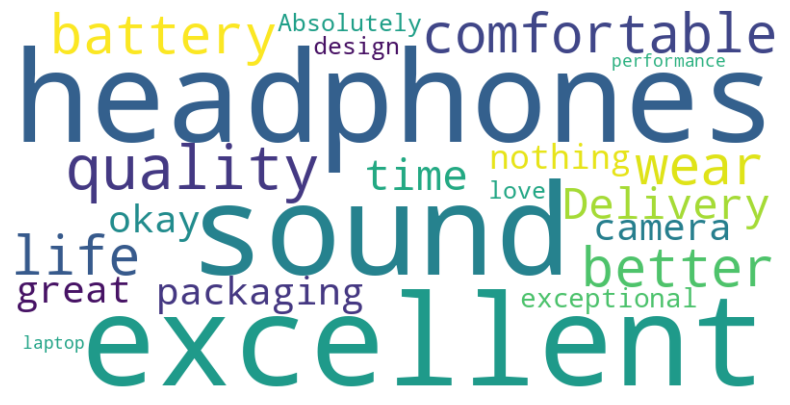

In [25]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#1
reviews = [
    "The headphones have excellent sound quality and are very comfortable to wear, but the battery life could be better.",
    "Customer service was terrible and unhelpful.",
    "Delivery was on time and the packaging was great!",
    "The camera is okay, nothing exceptional.",
    "Absolutely love the design and performance of this laptop!"
]
positive_reviews = []
for(i,review) in enumerate(reviews):
  blob = TextBlob(review)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity
  print(f"Review: {review}")
  print(f"Polarity: {polarity}")
  print(f"Subjectivity: {subjectivity}")
  if polarity > 0.1:
      sentiment = "Positive"
      positive_reviews.append(review)
  elif polarity < -0.1:
      sentiment = "Negative"
  else:
      sentiment = "Neutral"
  print(f"Sentiment: {sentiment}")
  print(" ")

#3
all_positive_text = " ".join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [41]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.optimizers import Adam

# 1. Training paragraph
text = """
Artificial Intelligence (AI) is a rapidly growing field in computer science. It involves creating machines that can think, learn, and make decisions like humans. AI has applications in various industries, including healthcare, finance, and transportation. Machine learning, a subset of AI, allows computers to learn from data and improve over time. Deep learning, a more advanced form of machine learning, uses neural networks to solve complex problems. As technology advances, AI continues to revolutionize the way we interact with the world and offers endless possibilities for innovation.
"""

# 2. Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
print("Total unique words:", total_words)

# 3. Create input sequences
input_sequences = []
for line in text.split(". "):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        input_sequences.append(token_list[:i+1])

# Padding sequences for uniform length
max_sequence_length = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# 4. Prepare the data
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = np.array([np.zeros(total_words) for _ in range(len(y))])
for i, label in enumerate(y):
    label[X[i][-1]-1] = 1  # Set the target word as 1 at its index position

# Reshaping X to be compatible with LSTM input shape
X = X.reshape(X.shape[0], X.shape[1], 1)

# 5. Build the LSTM Model
model = Sequential()
model.add(LSTM(128, input_shape=(X.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001))  # Corrected line


# 6. Train the Model
model.fit(X, y, epochs=50, batch_size=64)

# 7. Generate Text
def generate_text(seed_text, num_words=50):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        token_list = token_list.reshape(token_list.shape[0], token_list.shape[1], 1)  # Reshape for LSTM
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs)  # Get the predicted index
        # Ensure we skip index 0 as it's not a valid word in the tokenizer's vocabulary
        if predicted_index == 0:
            predicted_index = 1  # You can also choose to handle this differently, e.g., skip this word
        predicted_word = tokenizer.index_word.get(predicted_index)  # Safe access with .get
        if predicted_word is None:
            break  # If we get an invalid word, stop the generation
        seed_text += " " + predicted_word
    return seed_text

# Provide a seed word to generate text
seed = "computer"
generated_text = generate_text(seed, num_words=20)
print("\nGenerated Text:\n", generated_text)



Total unique words: 71
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 4.2736
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 4.1993 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.1647
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4.1311
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.0991
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 4.0662
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 4.0261
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.0313
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.9794 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.9376
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3.9089
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 3.8631 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 3.8013
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 3.7642
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.6967 
Epoch 1

In [35]:
!pip install keras tensorflow

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.optimizers import Adam
import numpy as np
import random
# Import to_categorical
from tensorflow.keras.utils import to_categorical

# Paragraph
text = """
Artificial Intelligence (AI) is a rapidly growing field in computer science. It involves creating machines that can think, learn, and make decisions like humans. AI has applications in various industries, including healthcare, finance, and transportation. Machine learning, a subset of AI, allows computers to learn from data and improve over time. Deep learning, a more advanced form of machine learning, uses neural networks to solve complex problems. As technology advances, AI continues to revolutionize the way we interact with the world and offers endless possibilities for innovation.
"""

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text.split("."):
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create features and labels
X = input_sequences[:,:-1]
y = input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words) # Now to_categorical is defined
print(" ")

model = Sequential()
# Change input_dim to total_words or a higher value
model.add(Embedding(input_dim=total_words, output_dim=10, input_length= input_sequences.shape[1]))
model.add(LSTM(50))
model.add(Dense(50, activation='relu'))
model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

print(" ")


def generate_lines(seed_text, total_lines=3, words_per_line=7):
    generated_text = ""
    current_seed = seed_text

    for _ in range(total_lines):
        line = ""
        for _ in range(words_per_line):
            token_list = tokenizer.texts_to_sequences([current_seed])[0]
            token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
            predicted = model.predict(token_list, verbose=0)
            predicted_word_index = np.argmax(predicted, axis=1)[0]

            output_word = ""
            for word, index in tokenizer.word_index.items():
                if index == predicted_word_index:
                    output_word = word
                    break

            # Handle out-of-vocabulary words
            if output_word == "":
                output_word = "[OOV]"  # Replace with a placeholder or handle differently

            current_seed += " " + output_word
            line += output_word + " "
        generated_text += line.strip() + "\n"

    return generated_text

# Try generating 3 lines of text from a seed word
seed = "Artificial"
print(generate_lines(seed))

--------------------------------------------------------------------


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

--------------------------------------------------------------------------------
applications intelligence deep intelligence and make intelligence
and growing problems for problems creating learn
[OOV] [OOV] [OOV] [OOV] [OOV] [OOV] [OOV]

